### 3-3 특성 공학과 규제 
#### > 다중회귀(multiple regression): 여러 개의 feature를 사용한 선형 회귀
#### > feature가 2개면 타깃값과 함께 3차원 공간을 형성
#### > 특성공학(feature engineering): 각 특성을 서로 곱해서 또 다른 특성을 만듦

#### > keyword: 다중회귀, 특성공학, 릿지, 라쏘 ,하이퍼파라미터(alpha)
#### > 핵심패키지와 함수: read_csv, PolynomialFeatures, Ridge, Lasso

#### 데이터 준비

In [8]:
#판다스(데이터 분석 라이브러리)
#판다스는 csv 파일의 첫 줄을 자동으로 인식해 열 제목으로 만들어줌

import pandas as pd
perch_full = pd.read_csv('http://bit.ly/perch_csv_data')
perch_full.head()



length   height   width
0     8.4     2.11    1.41
1    13.7     3.53    2.00
2    15.0     3.82    2.43
3    16.2     4.59    2.63
4    17.4     4.59    2.94

In [9]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [10]:
#훈련세트와 테스트세트 나누기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

##### 사이킷런의 변환기 클래스: 특성을 만들거나 전처리 하는 클래스
##### 변환기(transformer): 변환기 클래스는 fit(), transform() method 제공

In [11]:
#preprocessing 모듈에 PolynomialFeatures 클래스 포함됨 
#특성이 2,3인 샘플

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()

#poly.fit() method는 새롭게 만들 특성의 조합을 찾음
#변환기는 입력데이터를 반환하는데 타깃데이터가 필요하지 않음
poly.fit([[2,3]])

#poly.transform method는 실레로 데이터로 변환
print(poly.transform([[2,3]]))

#PolynomialFeatures는 기본적으로 각 원소의 제곱값과, 원소끼리 곱한 값을 반환함
#2의 제곱값, 3의 제곱값, 2*3 곱한값 
#무게=a*길이 + b*높이 + c*두께 + d*1 : 선형 방정싯의 절편을 항상 값이 1인 특성과 곱해지는 계수 (길이, 높이, 두께, 1)

[[1. 2. 3. 4. 6. 9.]]


In [12]:
#절편을 위한 항을 제거(사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시함)

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
#훈련세트에 적용

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [ ]:
#생성된 9개의 특성 확인

poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [19]:
#테스트세트에 적용
test_poly= poly.transform(test_input)

#### 다중 회귀 모델 훈련하기

In [ ]:
#train_poly를 사용해 모델 훈련

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [ ]:
#teat_poly를 사용해 모델 훈련

print(lr.score(test_poly, test_target))

0.9714559911594155


In [ ]:
#고차항의 최대 차수를 지정하여 3제곱, 4제곱 항을 넣기

poly = PolynomialFeatures (degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [23]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


In [ ]:
print(lr.score(test_poly, test_target))

#훈련세트에는 거의 완벽하게 학습했지만, 훈련세트에 너무 overfitting되서 테스트 세트에서는 형편없음

-144.40744533753661


#### 규제(regularization): 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방 -> 선형 회귀 모델의 경우 계수 or 기울기의 크기를 작게 만드는 일
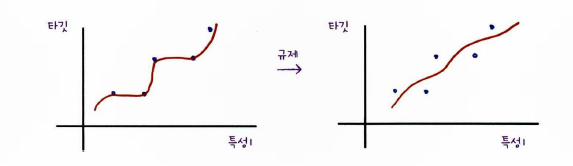
#### > 기울기 값의 크기가 서로 많이 다르면 공정하게 제어가 되지 않음
#### > 규제를 적용하기 전 정규화를 진행 -> StandardScaler 클래스를 사용

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)                       #train _poly로 객체 훈련
train_scaled = ss.transform(train_poly)  #표준점수로 변환한 세트
test_scaled = ss.transform(test_poly)

#훈련 세트에서 학습한 평균과 표준편차는 StandardScaler 클래스 객체의 mean_, scale_속성에 저장. 특성마다 계산함으로 55개의 평균과 표준편차가 저장됨.

#### 선형 회귀 모델에 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라 부름
#### 릿지: 계수(기울기)를 제곱한 값을 기준으로 규제 적용 -> 일반적으로 릿지를 조금 더 선호 
#### 라쏘: 계수(기울기)의 절대값을 기준으로 규제 적용  

In [31]:
# 릿지 회귀 
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [32]:
#테스트 세트에 대한 점수 확인
print(ridge.score(test_scaled,test_target))

0.9790693977615375


In [33]:
#적절한 alpha값은 alpha값에 대한 R2값의 그래프 그려보는 것
#alpha 값을 바꿀때마다 score() method 결과를 저장할 리스트 만듦
import matplotlib.pyplot as plt
train_score =[]
test_score=[]

In [35]:
alpha_list=[0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #릿지 모델 제작 
    ridge = Ridge(alpha=alpha)
    #릿지 모델 훈련 
    ridge.fit(train_scaled, train_target)
    #훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

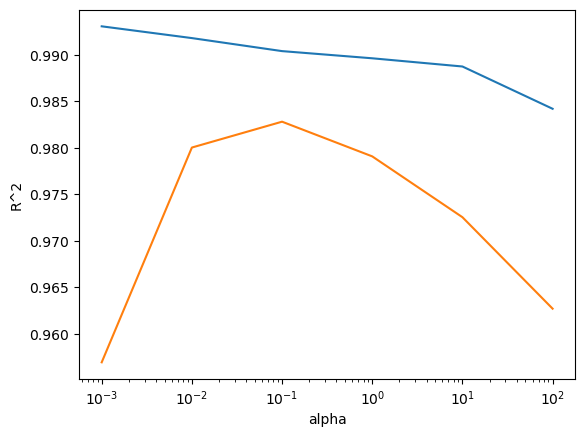

In [ ]:
plt.plot(alpha_list,train_score)
plt.plot(alpha_list,test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

#훈련세트 그래프와 테스트세트 그래프에서 가장 가까운 alpha값 = 0.1

In [38]:
ridge= Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


0.9903815817570367
0.9827976465386995


#### 라쏘 회귀

In [ ]:
#릿지 모델과 동일하게 라쏘 모델도 훈련
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled,train_target))

0.989789897208096


In [40]:
print(lasso.score(test_scaled, test_target))

0.9800593698421886


In [43]:
#릿지 모델과 동일하게 적절한 alpha 값을 찾아 모델 최적화 
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #라쏘 모델 제작
    lasso = Lasso(alpha=alpha, max_iter=10000)
    #라쏘 모델 훈련 
    lasso.fit(train_scaled, train_target)
    #훈련점수와 테스트 점수 저장 
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/user/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/user/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


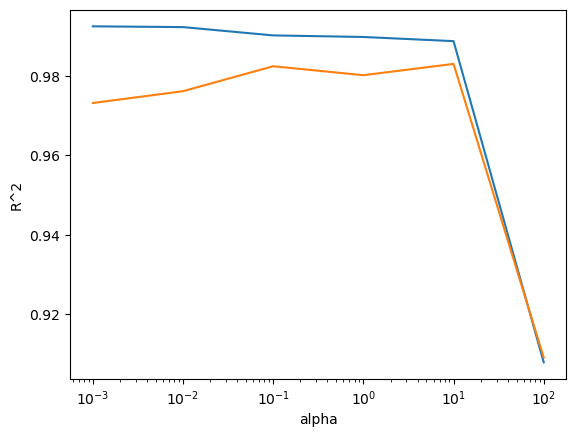

In [ ]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

#라쏘 모델에서 가장 적합한 alpha 값은 10

In [ ]:
#적합한 alpha값으로 라쏘모델 다시 훈련 

lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))


0.9888067471131866
0.9824470598706695


In [ ]:
#라쏘 모델에서 꼐수가 0인 것의 갯수
print(np.sum(lasso.coef_==0))

#55개의 특성을 모델에 주입했지만 라쏘모델이 활용한 특성은 15개 ->라쏘 모델은 유용한 특성을 골라내는 용도로 사용 가능

40
